In [89]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
dataset = pd.read_csv('BreastCancer.csv')
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [121]:
features = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

scaler = MinMaxScaler()

Y = dataset['Class'].to_numpy()
X = scaler.fit_transform(dataset[features].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

weights = []
for i in Y_train: 
  if i == 0:
    weights.append(1e-1)
  else: 
    weights.append(1)

Accuracy: 0.9560975609756097


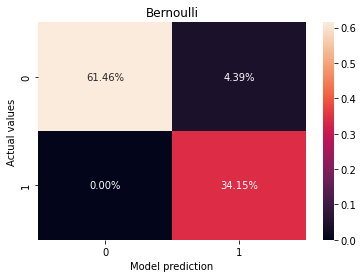

In [117]:
clf = BernoulliNB()
clf.fit(X_train, Y_train, sample_weight=weights)

Y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)}')

plt.figure()
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%')
plt.xlabel('Model prediction')
plt.ylabel('Actual values')
plt.title('Bernoulli')
plt.show()

Accuracy: 0.9560975609756097


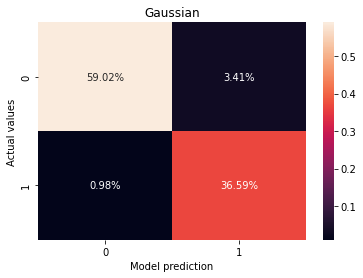

In [122]:
clf = GaussianNB()
clf.fit(X_train, Y_train, sample_weight=weights)

Y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)}')

plt.figure()
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%')
plt.xlabel('Model prediction')
plt.ylabel('Actual values')
plt.title('Gaussian')
plt.show()